In [16]:
import requests
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
API_ENDPOINT_URL =  'http://lauzhack.sqpub.ch/histo_prices'

r = requests.get(API_ENDPOINT_URL)

In [4]:
raw_data = r.text.split('\n')

In [8]:
data_series = pd.Series(raw_data)
data_series = data_series.str.split(' ')

data = pd.DataFrame(data_series.values.tolist(), index=data_series.index)
data.columns = ['timestamp', 'price']
data['timestamp'] = pd.to_datetime(data.timestamp)
data.set_index('timestamp', inplace=True)
data['price'] = data['price'].astype(float)



In [9]:
data.head()


,price
timestamp,
2018-11-16 23:59:00,5433.87
2018-11-19 00:00:05,5536.29
2018-11-19 00:00:20,5534.45
2018-11-19 00:01:00,5534.61
2018-11-19 00:02:00,5541.78


In [10]:
mean_minute = data.groupby(pd.Grouper(freq='60s')).mean()

mean_minute

,price
timestamp,
2018-11-16 23:59:00,5433.870000
2018-11-17 00:00:00,NaN
2018-11-17 00:01:00,NaN
2018-11-17 00:02:00,NaN
2018-11-17 00:03:00,NaN
2018-11-17 00:04:00,NaN
2018-11-17 00:05:00,NaN
2018-11-17 00:06:00,NaN
2018-11-17 00:07:00,NaN


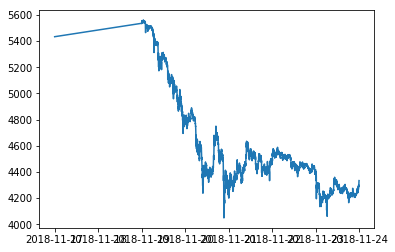

In [17]:
plt.plot(data)